# 서울지역 스타벅스 매장정보 크롤링 ¶

★ 아래 과제1부터 5까지의 순서는 체계화된 순서임! 이 순서를 여러번 반복해보며 익히는 것도 중요함!

- 과제1 : 메인화면 페이지 화면캡쳐 및 저장
- 과제2 : 서울지역 스타벅스 매장정보 크롤링
- 과제3 : 서울인구 정보를 가져온 후 스타벅스지표를 나타낸다. (스벅비율=alpha100스타벅스매장수/인구수)
- 과제4 : 스벅비율 및 스벅매장수를 서울시 지도에 시각화
- 과제5 : 스벅비율이 반영된 파일을 저장

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image
import time

import re

In [2]:
drive_path = "driver/chromedriver.exe"

In [3]:
driver = webdriver.Chrome(executable_path=drive_path)

In [4]:
starbucks_url = 'http://www.istarbucks.co.kr/index.do'

In [5]:
driver.get(starbucks_url)

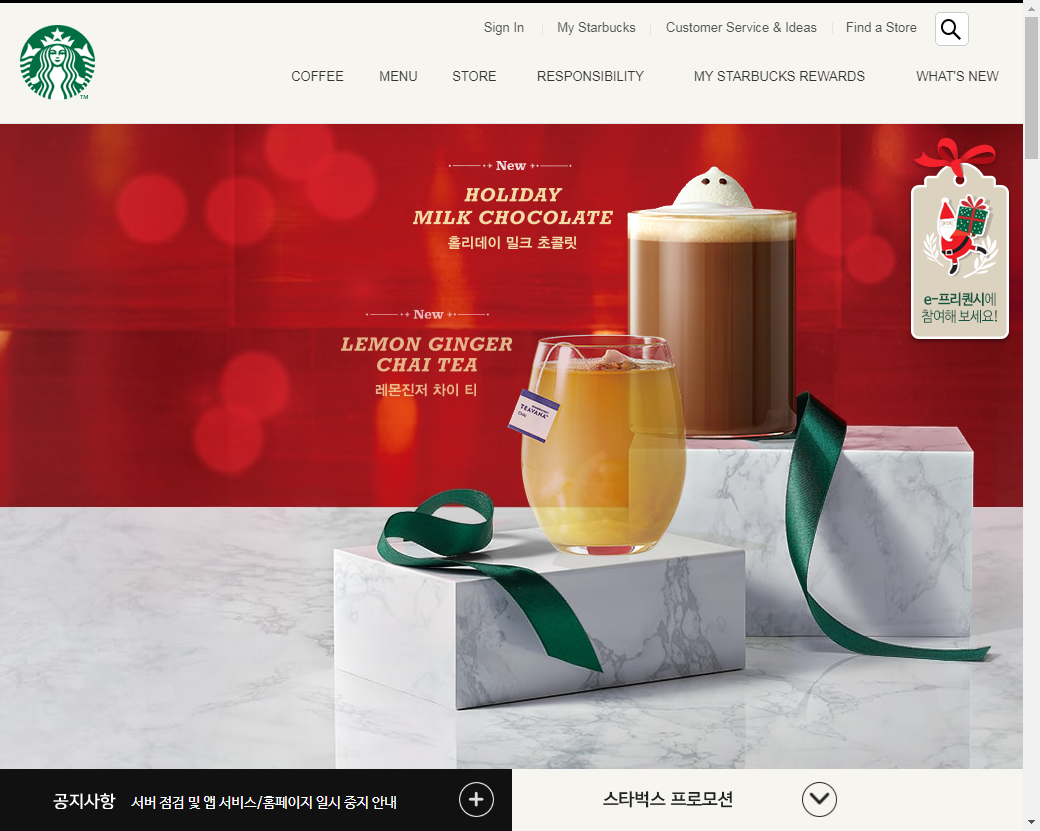

In [6]:
################## - 과제1 : 메인화면 페이지 화면캡쳐 및 저장
capture_img = './images/starbucks.png'
driver.save_screenshot(capture_img)
Image(capture_img)

In [7]:
################## 과제2 : 서울지역 스타벅스 매장정보 크롤링

In [8]:
# FIND A STORE
driver.find_element_by_css_selector('#gnb > div > div > nav > ul > li.util_nav04 > a').click()

In [ ]:
time.sleep(3) # 해당 매장 정보가 불러오기까지 약간의 시간이 걸리므로  time library의 time.sleep()으로 좀 더 안정성 확보

In [10]:
# 지역검색
driver.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a').click()

In [ ]:
time.sleep(3)

In [11]:
# 전체
driver.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a').click()

In [ ]:
time.sleep(3)

In [12]:
# 전체 접속
driver.find_element_by_css_selector('#mCSB_2_container > ul > li:nth-child(1) > a').click()
time.sleep(5) 

In [13]:
html = driver.page_source # 현재 지금 표시되고있는 홈페이지 자체의 소스코드를 불러온다. (즉, 주소가 변경되지 않았더라도 괜찮음!)

In [14]:
soup = BeautifulSoup(html, "lxml")

In [15]:
locations = soup.find_all("ul", "quickSearchResultBoxSidoGugun")

In [16]:
len(locations[0]) # 스타벅스에서 표시되어있는 478개와 갯수가 동일함을 알 수 있다. # locations[1]은 어디 다른 곳에 또 포함된 데이터

478

In [17]:
locations2 = locations[0].get_text()

In [18]:
locations2

' 압구정R   서울특별시 강남구 언주로 861 (신사동)02-541-3622 리저브 매장 2번 수서역R   서울특별시 강남구 광평로 281 (수서동)02-6181-3688 리저브 매장 2번 양재강남빌딩R   서울특별시 강남구 남부순환로 2621 (도곡동)02-571-3604 리저브 매장 2번 선릉동신빌딩R   서울특별시 강남구 테헤란로 409 (삼성동)02-2051-3562 리저브 매장 2번 봉은사로선정릉   서울특별시 강남구 봉은사로 446 (삼성동)02-539-3564 리저브 매장 2번 강남오거리   서울특별시 강남구 봉은사로2길 39 (역삼동)02-557-3484 리저브 매장 2번 스타필드코엑스몰R   서울특별시 강남구 영동대로 513 (삼성동)02-6002-3467 리저브 매장 2번 강남구청정문   서울특별시 강남구 학동로 419 (청담동)02-514-3397 리저브 매장 2번 도곡공원   서울특별시 강남구 도곡로 205 (역삼동)02-565-3496 리저브 매장 2번 강남R   서울특별시 강남구 강남대로 390 (역삼동)02-561-3478 리저브 매장 2번 대치은마사거리   서울특별시 강남구 도곡로 457 (대치동)02-554-3315 리저브 매장 2번 청담영동대로   서울특별시 강남구 영동대로 720 (청담동)02-3443-3371 리저브 매장 2번 압구정   서울특별시 강남구 압구정로30길 17 (신사동)02-541-3306 리저브 매장 2번 신사가로수   서울특별시 강남구 압구정로12길 32 (신사동)02-3446-3356 리저브 매장 2번 청담스타R   서울특별시 강남구 도산대로57길 24 (청담동)02-514-3364 리저브 매장 2번 강남우성   서울특별시 강남구 강남대로 328 (역삼동)02-565-3347 리저브 매장 2번 학동사거리   서울특별시 강남구 도산대로 328 (논현동) HS빌딩02-758-8971 리저브 매장 2번 대치사거리   서울특별시 강남구 삼성로 402 (대치동)02-561-3287 리저브 매장 2번 포스코사거리 

In [19]:
# 우선 locations2의 값이 너무 많으니깐 좀 분리해내보자. 우선 매장명만 분리해보자.
print(locations[0].find_all("strong"))
locations3_stores = locations[0].find_all("strong")

[<strong>압구정R  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="압구정R" data-store="1411" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong>, <strong>수서역R  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="수서역R" data-store="1389" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong>, <strong>양재강남빌딩R  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="양재강남빌딩R" data-store="1404" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong>, <strong>선릉동신빌딩R  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="선릉동신빌딩R" data-store="1355" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong>, <strong>봉은사로선정릉  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" dat

In [20]:
len(locations3_stores), locations3_stores[0] # 총 갯수 478개의 리스트가 담겨져있다.

(478,
 <strong>압구정R  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="압구정R" data-store="1411" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong>)

In [21]:
locations3_stores[0].get_text()

'압구정R  '

In [22]:
locations3_stores[0].get_text().split()

['압구정R']

In [23]:
locations3_locations_phones = locations[0].find_all("p")
len(locations3_locations_phones), locations3_locations_phones[0]

(478,
 <p class="result_details">서울특별시 강남구 언주로 861 (신사동)<br/><a href="tel:02-541-3622">02-541-3622</a></p>)

In [24]:
locations3_locations_phones[0].get_text()

'서울특별시 강남구 언주로 861 (신사동)02-541-3622'

In [25]:
# 주소와 번호가 분리할 수 있도록 정규표현식을 사용한다.

In [26]:
#### split('(') 으로 분리하려고 했으나, 납부순환로 2082-25 02-758-8721 처럼 ()가 없는 데이터가 있어서 이렇게 분리하면 안되더라.
tmp = locations3_locations_phones[0].get_text()
tmp = tmp.split('(')
tmp

# 주소의 앞 뒤 공백을 제거한다.
tmp_add = tmp[0].strip()
tmp_add

# 정규표현식을 사용하여 번호만을 추출한다.
pattern = re.compile("\d{2,3}-\d{3,4}-\d{4}$")
pattern.findall(tmp[1])

# 이제 모두 종합하여 매장명, 주소, 전화번호를 분리해낸다

['02-541-3622']

In [27]:
#### 좋은 방법 중 하나는 정규표현식으로 번호를 분리해내고 '주소(~동)' 으로 그냥 분리해내자

In [28]:
tmp = locations3_locations_phones[0].get_text()

# 정규표현식을 사용하여 번호만을 추출한다.
pattern = re.compile("\d{2,3}-\d{3,4}-\d{4}$")
pattern.findall(tmp)

['02-541-3622']

In [29]:
# 전화번호 길이만큼 뺀다.
tmp[0:len(tmp)-len(pattern.findall(tmp)[0])]

'서울특별시 강남구 언주로 861 (신사동)'

In [30]:
starbucks_stores = []
starbucks_add = []
starbucks_phone = []
starbucks_gu = []
starbucks_gun = []

for i in range(len(locations[0])) :
    starbucks_stores.append(locations3_stores[i].get_text().split())
    tmp2 = locations3_locations_phones[i].get_text()
    
    starbucks_phone.append(pattern.findall(tmp2)[0])
    
    starbucks_add.append(tmp2[0:len(tmp2)-len(pattern.findall(tmp2)[0])])
    
    starbucks_gu.append(starbucks_add[i].split()[1])
    starbucks_gun.append(starbucks_add[i].split()[2])

In [31]:
import pandas as pd

In [32]:
result = pd.DataFrame({'Store' : starbucks_stores, 'Address' : starbucks_add, 'Phone' : starbucks_phone, 'Gu' : starbucks_gu, 'Gun' : starbucks_gun})
result.head(10)

,Store,Address,Phone,Gu,Gun
0,[압구정R],서울특별시 강남구 언주로 861 (신사동),02-541-3622,강남구,언주로
1,[수서역R],서울특별시 강남구 광평로 281 (수서동),02-6181-3688,강남구,광평로
2,[양재강남빌딩R],서울특별시 강남구 남부순환로 2621 (도곡동),02-571-3604,강남구,남부순환로
3,[선릉동신빌딩R],서울특별시 강남구 테헤란로 409 (삼성동),02-2051-3562,강남구,테헤란로
4,[봉은사로선정릉],서울특별시 강남구 봉은사로 446 (삼성동),02-539-3564,강남구,봉은사로
5,[강남오거리],서울특별시 강남구 봉은사로2길 39 (역삼동),02-557-3484,강남구,봉은사로2길
6,[스타필드코엑스몰R],서울특별시 강남구 영동대로 513 (삼성동),02-6002-3467,강남구,영동대로
7,[강남구청정문],서울특별시 강남구 학동로 419 (청담동),02-514-3397,강남구,학동로
8,[도곡공원],서울특별시 강남구 도곡로 205 (역삼동),02-565-3496,강남구,도곡로
9,[강남R],서울특별시 강남구 강남대로 390 (역삼동),02-561-3478,강남구,강남대로


In [33]:
################## 과제3 : 서울인구 정보를 가져온 후 스타벅스지표를 나타낸다. (스벅비율=alpha100스타벅스매장수/인구수)

In [34]:
result['Gu'].value_counts()

강남구     71
중구      48
서초구     45
종로구     38
영등포구    33
마포구     32
송파구     27
서대문구    20
용산구     17
강서구     14
양천구     14
광진구     13
성북구     12
금천구     10
노원구     10
구로구     10
강동구     10
동대문구     9
성동구      9
관악구      9
은평구      8
동작구      7
중랑구      6
강북구      5
도봉구      1
Name: Gu, dtype: int64

In [35]:
result_Gu = result['Gu'].value_counts()

In [36]:
result_Gu.index

Index(['강남구', '중구', '서초구', '종로구', '영등포구', '마포구', '송파구', '서대문구', '용산구', '강서구',
       '양천구', '광진구', '성북구', '금천구', '노원구', '구로구', '강동구', '동대문구', '성동구', '관악구',
       '은평구', '동작구', '중랑구', '강북구', '도봉구'],
      dtype='object')

In [38]:
# 인구수가 있는 population.csv 파일을 가져오자
population = pd.read_csv("seoul_people.csv", sep=',')
population.head()

,Unnamed: 0,구,세대,인구수,세대당인구,65세이상고령자,고령비율
0,0,강남구,228883,549255,2.399720,66412,12.091287
1,1,양천구,176598,469945,2.661100,57442,12.223132
2,2,강서구,257558,605068,2.349249,78814,13.025643
3,3,용산구,108777,245087,2.253114,37443,15.277432
4,4,서초구,173912,441539,2.538864,54887,12.430838


In [39]:
# index_col='Unnamed: 0'') 삭제
del population['Unnamed: 0']
population.head()

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
0,강남구,228883,549255,2.399720,66412,12.091287
1,양천구,176598,469945,2.661100,57442,12.223132
2,강서구,257558,605068,2.349249,78814,13.025643
3,용산구,108777,245087,2.253114,37443,15.277432
4,서초구,173912,441539,2.538864,54887,12.430838


In [40]:
population.set_index('구', inplace=True)
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율
구,,,,,
강남구,228883,549255,2.399720,66412,12.091287
양천구,176598,469945,2.661100,57442,12.223132
강서구,257558,605068,2.349249,78814,13.025643
용산구,108777,245087,2.253114,37443,15.277432
서초구,173912,441539,2.538864,54887,12.430838


In [41]:
result_Gu

강남구     71
중구      48
서초구     45
종로구     38
영등포구    33
마포구     32
송파구     27
서대문구    20
용산구     17
강서구     14
양천구     14
광진구     13
성북구     12
금천구     10
노원구     10
구로구     10
강동구     10
동대문구     9
성동구      9
관악구      9
은평구      8
동작구      7
중랑구      6
강북구      5
도봉구      1
Name: Gu, dtype: int64

In [42]:
# 읽어온 파일에 구별 매장 수 추가
population = pd.concat([population, result_Gu], axis=1)
population.head()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,세대,인구수,세대당인구,65세이상고령자,고령비율,Gu
강남구,228883,549255,2.399720,66412,12.091287,71
강동구,177591,434992,2.449403,58280,13.397948,10
강북구,143172,324276,2.264940,57741,17.806128,5
강서구,257558,605068,2.349249,78814,13.025643,14
관악구,261401,521685,1.995727,71840,13.770762,9


In [43]:
population.rename(columns = {'Gu':'스타벅스'}, inplace=True)
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스
강남구,228883,549255,2.399720,66412,12.091287,71
강동구,177591,434992,2.449403,58280,13.397948,10
강북구,143172,324276,2.264940,57741,17.806128,5
강서구,257558,605068,2.349249,78814,13.025643,14
관악구,261401,521685,1.995727,71840,13.770762,9


In [44]:
population['스타벅스'] / population['인구수'] * 100 * 1000

강남구     12.926601
강동구      2.298893
강북구      1.541896
강서구      2.313790
관악구      1.725179
광진구      3.513523
구로구      2.276691
금천구      3.962609
노원구      1.814655
도봉구      0.291554
동대문구     2.458338
동작구      1.716002
마포구      8.310998
서대문구     6.201608
서초구     10.191625
성동구      2.837353
성북구      2.669194
송파구      4.008421
양천구      2.979072
영등포구     8.173901
용산구      6.936312
은평구      1.639852
종로구     23.300590
중구      35.487735
중랑구      1.466785
dtype: float64

In [45]:
population['스타벅스지표'] = population['스타벅스'] / population['인구수'] * 100 * 1000
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스타벅스지표
강남구,228883,549255,2.399720,66412,12.091287,71,12.926601
강동구,177591,434992,2.449403,58280,13.397948,10,2.298893
강북구,143172,324276,2.264940,57741,17.806128,5,1.541896
강서구,257558,605068,2.349249,78814,13.025643,14,2.313790
관악구,261401,521685,1.995727,71840,13.770762,9,1.725179


In [46]:
population.sort_values(by='스타벅스', ascending=False).head(10)

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스타벅스지표
강남구,228883,549255,2.399720,66412,12.091287,71,12.926601
중구,61232,135258,2.208943,21902,16.192758,48,35.487735
서초구,173912,441539,2.538864,54887,12.430838,45,10.191625
종로구,73696,163086,2.212956,26622,16.323903,38,23.300590
영등포구,170208,403724,2.371945,55364,13.713329,33,8.173901
마포구,171320,385032,2.247443,50559,13.131116,32,8.310998
송파구,269558,673582,2.498839,80220,11.909463,27,4.008421
서대문구,138027,322497,2.336478,50278,15.590223,20,6.201608
용산구,108777,245087,2.253114,37443,15.277432,17,6.936312
양천구,176598,469945,2.661100,57442,12.223132,14,2.979072


In [47]:
population.sort_values(by='인구수', ascending=False).head(10)

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스타벅스지표
송파구,269558,673582,2.498839,80220,11.909463,27,4.008421
강서구,257558,605068,2.349249,78814,13.025643,14,2.313790
노원구,217900,551069,2.529000,76466,13.875939,10,1.814655
강남구,228883,549255,2.399720,66412,12.091287,71,12.926601
관악구,261401,521685,1.995727,71840,13.770762,9,1.725179
은평구,203951,487849,2.391991,76643,15.710394,8,1.639852
양천구,176598,469945,2.661100,57442,12.223132,14,2.979072
성북구,186744,449574,2.407435,67447,15.002425,12,2.669194
서초구,173912,441539,2.538864,54887,12.430838,45,10.191625
구로구,172121,439234,2.551891,61293,13.954521,10,2.276691


In [48]:
population.sort_values(by='스타벅스지표', ascending=False).head(10)

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스타벅스지표
중구,61232,135258,2.208943,21902,16.192758,48,35.487735
종로구,73696,163086,2.212956,26622,16.323903,38,23.300590
강남구,228883,549255,2.399720,66412,12.091287,71,12.926601
서초구,173912,441539,2.538864,54887,12.430838,45,10.191625
마포구,171320,385032,2.247443,50559,13.131116,32,8.310998
영등포구,170208,403724,2.371945,55364,13.713329,33,8.173901
용산구,108777,245087,2.253114,37443,15.277432,17,6.936312
서대문구,138027,322497,2.336478,50278,15.590223,20,6.201608
송파구,269558,673582,2.498839,80220,11.909463,27,4.008421
금천구,106774,252359,2.363487,35299,13.987613,10,3.962609


In [49]:
################## - 과제4 : 스벅비율 및 스벅매장수를 서울시 지도에 시각화

In [50]:
#! pip install folium

In [51]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

starbucksDat = pd.DataFrame({'gu':population.index, 'counts':population['스타벅스지표']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=starbucksDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [52]:
map

In [53]:
################## - 과제5 : 스벅비율이 반영된 파일을 저장

In [54]:
population.to_csv('data/starbucks.csv', sep=',', encoding='UTF-8')

In [55]:
a = pd.read_csv("./data/starbucks.csv", sep=',')

In [56]:
a

,Unnamed: 0,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스타벅스지표
0,강남구,228883,549255,2.399720,66412,12.091287,71,12.926601
1,강동구,177591,434992,2.449403,58280,13.397948,10,2.298893
2,강북구,143172,324276,2.264940,57741,17.806128,5,1.541896
3,강서구,257558,605068,2.349249,78814,13.025643,14,2.313790
4,관악구,261401,521685,1.995727,71840,13.770762,9,1.725179
5,광진구,161714,369999,2.287984,45202,12.216790,13,3.513523
6,구로구,172121,439234,2.551891,61293,13.954521,10,2.276691
7,금천구,106774,252359,2.363487,35299,13.987613,10,3.962609
8,노원구,217900,551069,2.529000,76466,13.875939,10,1.814655
9,도봉구,137901,342990,2.487219,55499,16.180938,1,0.291554
